<a href="https://colab.research.google.com/github/schauppi/Udemy_TensorFlow_Developer/blob/main/Abschnitt_3_Neural_Network_regression_with_TensorFlow/01_neural_network_regression_with_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we´re going to simplify it: predicting a numerical variable based on some other combinations of variables, even shorter... predicting a number



In [1]:
#Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.5.0


#Create data to view and fit

In [2]:
import numpy as np
import matplotlib.pyplot as plt

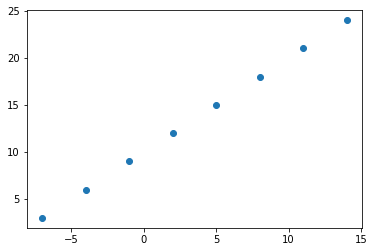

In [3]:
#Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

#Create labels
Y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#visualize
plt.scatter(X, Y)

#Input and output shapes

In [4]:
#Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
input_shape = X[0].shape
output_shape = Y[0].shape

In [6]:
print(input_shape)
print(output_shape)

()
()


In [7]:
X[0], Y[0]

(-7.0, 3.0)

#Turn NumPy arrays into tensors and Change Datatype



In [17]:
X = tf.cast(tf.constant(X), dtype=tf.float32)
Y = tf.cast(tf.constant(Y), dtype=tf.float32)

In [18]:
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [19]:
input_shape = X[0].shape
output_shape = Y[0].shape

In [20]:
input_shape, output_shape

(TensorShape([]), TensorShape([]))

#Steps in modelling with TensorFlow
1. Creating a model  define the input and output layers, as well as the hidden layers of a deep learning model.
2. Compiling a model  define the loss function (in other words, the function how wrong it s) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance to our model).
3. Fitting a model - letting the model try to find pattern between X & Y (features an labels)

In [21]:
#Set random seed
tf.random.set_seed(42)

In [22]:
#1. Create a model using the Sequential API
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit the model
model.fit(X, Y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 236ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 5ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 6ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 10.9748 - mae: 10.9748


In [23]:
#Check out X and Y
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [25]:
#Try and make a predictions using our model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

In [26]:
y_pred + 11

array([[23.71602]], dtype=float32)

###Improving our model

We can improve our mode, by altering the steps we took to create a model

1. Creating a model - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. Compile the model - here we might change the optimization function or perhaps the leraning rate of the optimization function.
3. Fitting the model - here we might fit a model for more epochs (leave training for longer) or on more data (give the model more examples to learn from)

In [30]:
#Let´s rebuild our model

#1. Create a model using the Sequential API
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit the model
model.fit(X, Y, epochs=100, verbose=0)

In [33]:
y_pred = model.predict([17.0])
y_pred

array([[29.955261]], dtype=float32)

In [44]:
#1. Create a model using the Sequential API
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

#3. Fit the model
model.fit(X, Y, epochs=150, verbose=0)

In [45]:
y_pred = model.predict([17.0])
y_pred

array([[-5.9700217]], dtype=float32)